# INFO BASICA

# LIBRERIAS

In [1]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

C:\Users\migue\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [3]:
# Leo los indicadores

indra = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja1', 
                           usecols=['Date', 'Indra'])

indra.columns = ['Date','Precio']
indra['Date'] = pd.to_datetime(indra['Date'], format="%Y-%m-%d")
indra = indra.set_index('Date')
indra = indra.loc['2015-04-30':,:]

In [4]:
# Procedo a calcular las medias moviles para 10, 30, 50 y 100 dias

indra['10MM'] = indra.Precio.rolling(window=10).mean()
indra['30MM'] = indra.Precio.rolling(window=30).mean()
indra['50MM'] = indra.Precio.rolling(window=50).mean()
indra['100MM'] = indra.Precio.rolling(window=100).mean()

In [5]:
# Visualizo una muestra

indra.head(20)

,Precio,10MM,30MM,50MM,100MM
Date,,,,,
2015-04-30,10.560,NaN,NaN,NaN,NaN
2015-05-01,10.560,NaN,NaN,NaN,NaN
2015-05-04,10.710,NaN,NaN,NaN,NaN
2015-05-05,10.335,NaN,NaN,NaN,NaN
2015-05-06,10.390,NaN,NaN,NaN,NaN
2015-05-07,10.295,NaN,NaN,NaN,NaN
2015-05-08,10.450,NaN,NaN,NaN,NaN
2015-05-11,10.450,NaN,NaN,NaN,NaN
2015-05-12,9.700,NaN,NaN,NaN,NaN


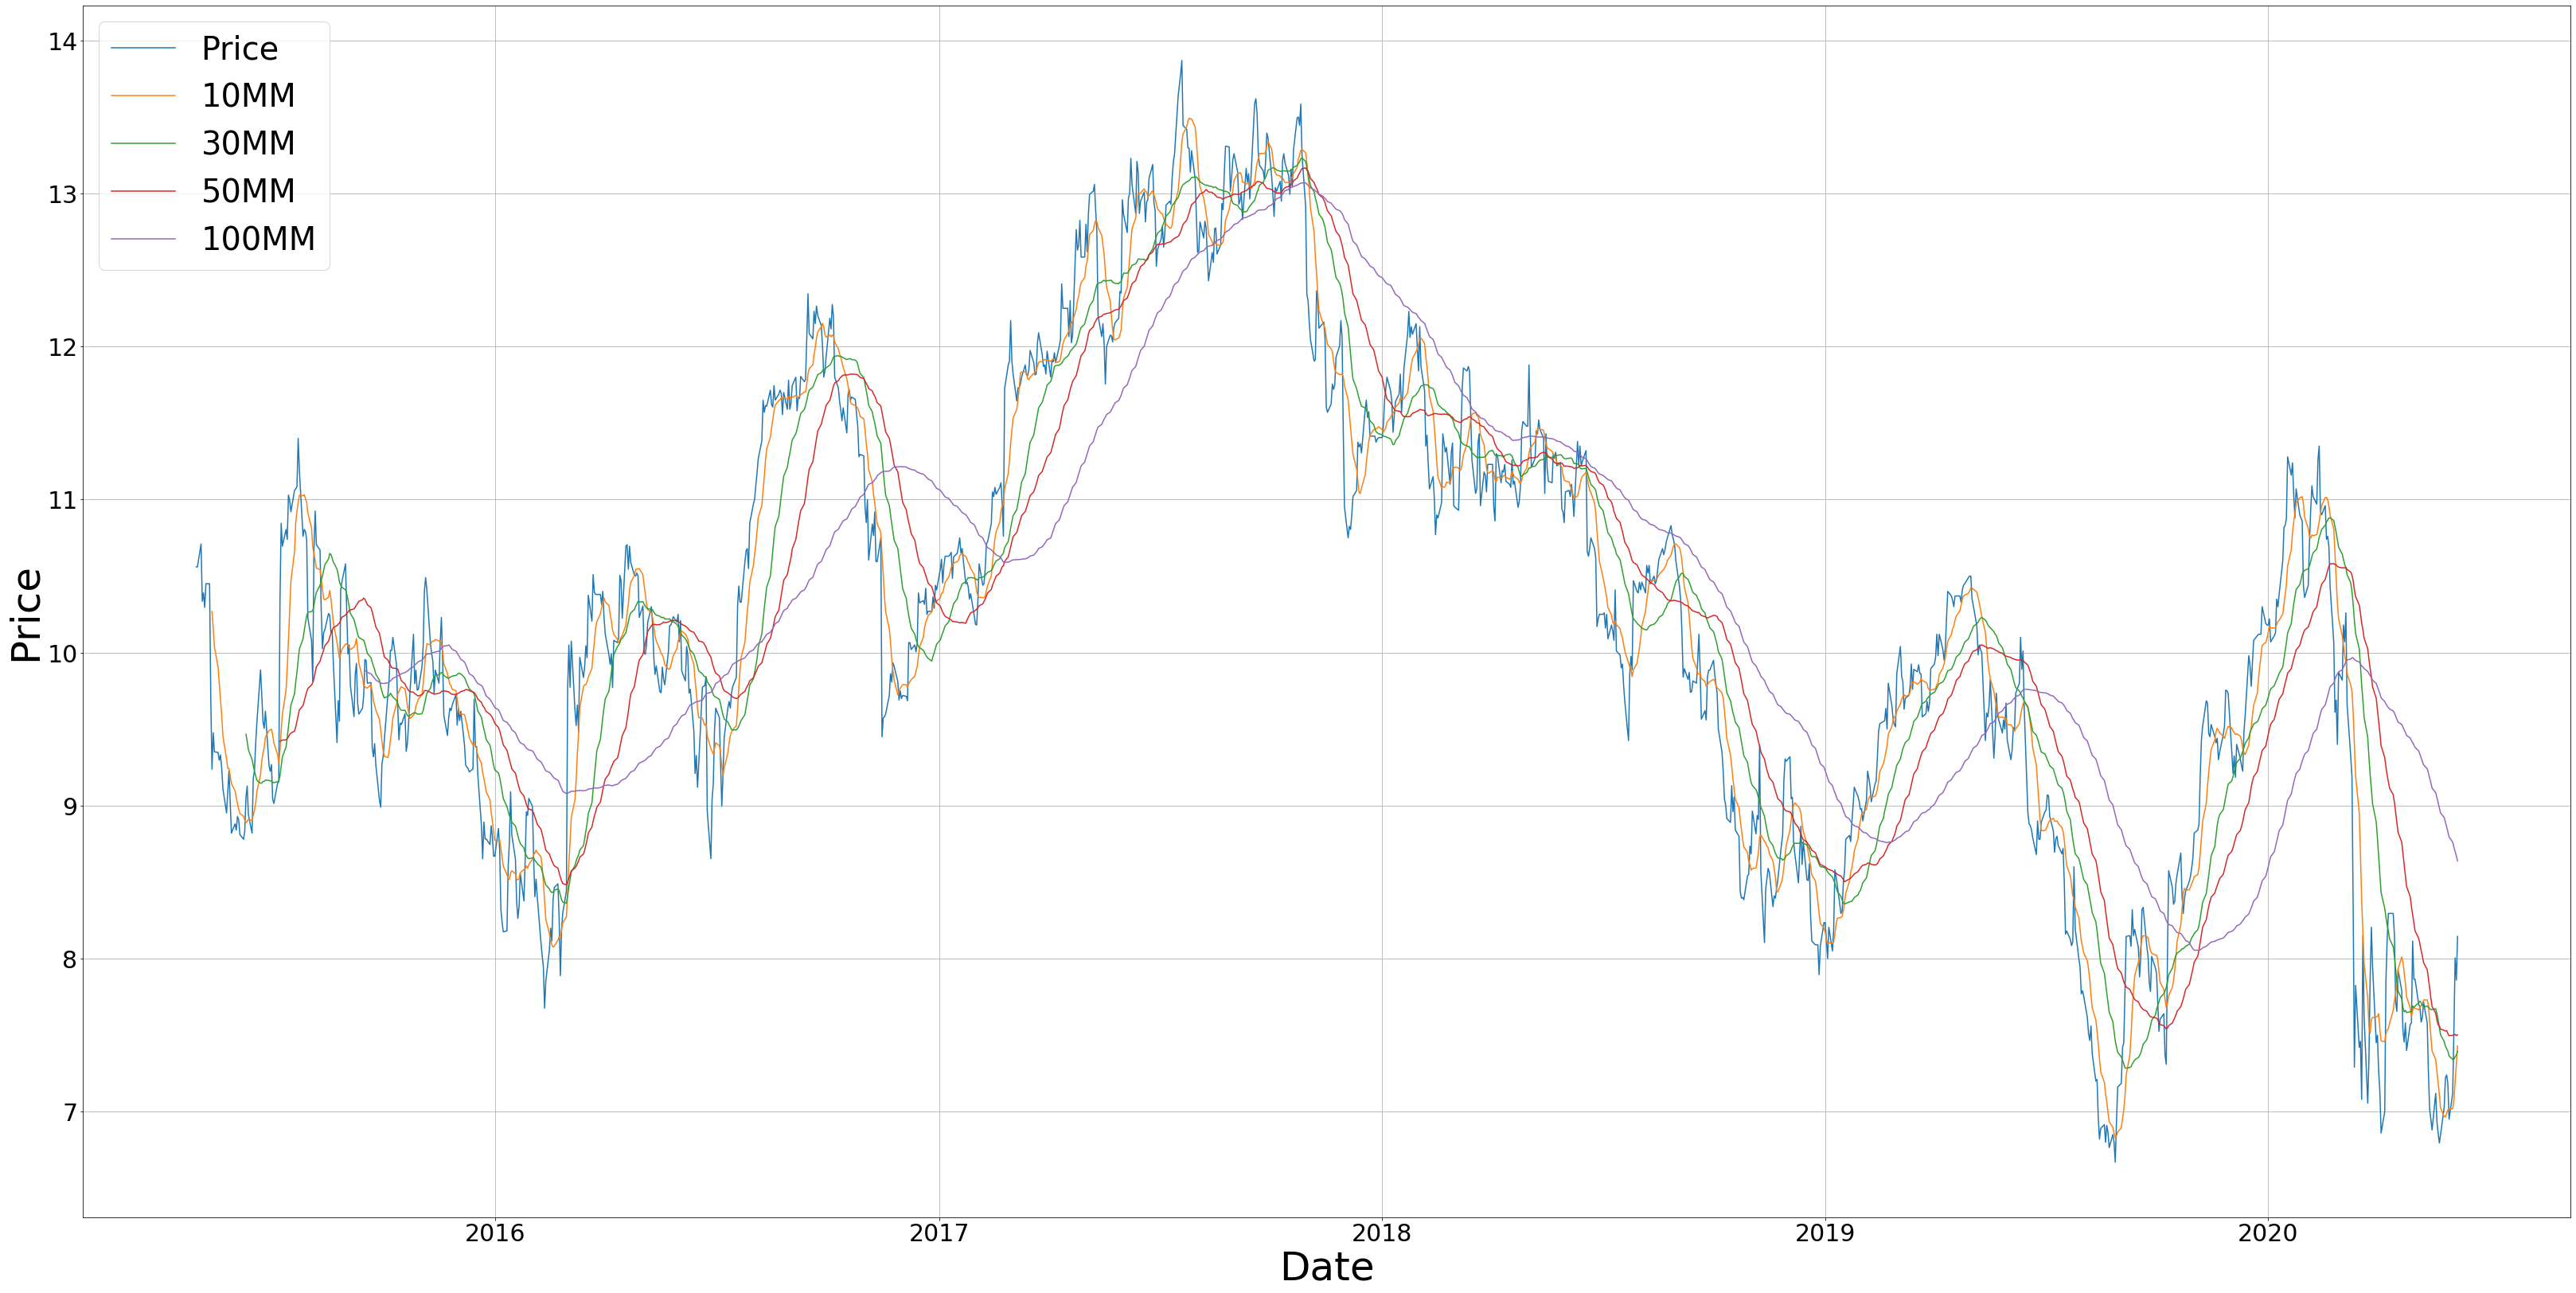

In [6]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(indra["Precio"])
ax1 = plt.plot(indra["10MM"])
ax1 = plt.plot(indra["30MM"])
ax1 = plt.plot(indra["50MM"])
ax1 = plt.plot(indra["100MM"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Price", "10MM", "30MM", "50MM", "100MM"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [7]:
# Ahora establezco señales, serán a corto, a medio y a largo y para ello utilizaré las medias móviles

# 1 es posición larga y -1 posición corta

indra['Señal a corto'] = np.where((np.isnan(indra['10MM']) | np.isnan(indra['30MM'])), 0, np.where((indra['10MM']>indra['30MM']), 1, -1))
indra['Señal a medio'] = np.where((np.isnan(indra['30MM']) | np.isnan(indra['50MM'])), 0, np.where((indra['30MM']>indra['50MM']), 1, -1))
indra['Señal a largo'] = np.where((np.isnan(indra['50MM']) | np.isnan(indra['100MM'])), 0, np.where((indra['50MM']>indra['100MM']), 1, -1))

In [8]:
# Visualizo una muestra, hay que mirar que si hay algún NaN devuelve True y no es así

indra.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo
Date,,,,,,,,
2019-05-03,10.310,10.4150,10.170167,10.00860,9.37590,1,1,1
2019-05-06,10.170,10.3950,10.189167,10.01900,9.39245,1,1,1
2015-09-23,9.319,9.6830,9.912500,10.23164,9.84114,-1,-1,1
2018-11-23,8.515,8.4355,8.658333,9.04470,9.65860,-1,-1,-1
2019-01-21,8.805,8.5045,8.370667,8.52090,8.91230,1,-1,-1
2020-05-06,7.585,7.6945,7.712833,8.05220,9.31300,-1,-1,-1
2019-04-18,10.370,10.2130,9.948667,9.79210,9.20660,1,1,1
2018-05-17,11.200,11.3410,11.281667,11.29460,11.40340,1,-1,-1
2016-11-28,9.811,9.7247,10.680067,11.18094,11.21396,-1,-1,-1


In [9]:
# Ahora determino el valor del conjunto de señales

def señalMM(corto=.9, medio=.05, largo=.05):
    indra['Señal MM'] = corto*indra['Señal a corto'] + medio*indra['Señal a medio'] + largo*indra['Señal a largo']


señalMM()

In [10]:
# Visualizo una muestra

indra.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM
Date,,,,,,,,,
2019-07-26,8.195,8.3360,8.685667,9.05390,9.54285,-1,-1,-1,-1.0
2016-12-01,9.700,9.7784,10.482900,11.03084,11.21483,-1,-1,-1,-1.0
2018-09-06,9.840,10.5130,10.516667,10.31990,10.72365,-1,1,-1,-0.9
2018-01-16,11.820,11.6660,11.449500,11.57590,12.31245,1,-1,-1,0.8
2019-01-10,8.535,8.2230,8.467500,8.55990,9.06305,-1,-1,-1,-1.0
2019-02-25,9.650,9.5180,9.120000,8.76590,8.76365,1,1,1,1.0
2015-09-30,9.272,9.4213,9.747567,10.04828,9.79943,-1,-1,1,-0.9
2016-11-14,10.750,10.7875,11.368333,11.61210,11.17594,-1,-1,1,-0.9
2020-06-05,8.145,7.4290,7.394000,7.50180,8.63855,1,-1,-1,0.8


In [11]:
# Ahora calculo las resistencia y soportes

indra['Resistencia'] = indra.Precio.rolling(window=100).max()
indra['Soporte'] = indra.Precio.rolling(window=100).min()

In [12]:
# Visualizo una muestra

indra.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte
Date,,,,,,,,,,,
2019-07-23,8.085,8.4775,8.840000,9.13690,9.58520,-1,-1,-1,-1.0,10.500,8.085
2015-10-12,9.920,9.6630,9.687533,9.89586,9.84201,-1,-1,1,-0.9,11.400,8.780
2018-01-19,11.860,11.6610,11.529333,11.54270,12.26780,1,-1,-1,0.8,13.620,10.750
2018-05-08,11.450,11.4250,11.227333,11.27780,11.40985,1,-1,-1,0.8,12.230,10.770
2016-03-30,10.400,10.3306,9.581067,9.10476,9.12537,1,1,-1,0.9,10.510,7.676
2018-04-19,11.100,11.1660,11.264667,11.22400,11.38610,-1,1,-1,-0.9,12.230,10.750
2016-07-19,10.300,9.6253,9.503533,9.70212,9.94327,1,-1,-1,0.8,10.705,8.653
2017-11-20,11.625,11.9855,12.634000,12.85560,12.93735,-1,-1,-1,-1.0,13.870,11.570
2017-12-05,10.825,11.5615,12.039000,12.48890,12.77205,-1,-1,-1,-1.0,13.870,10.750


In [13]:
# Genero la señal de resistencias y soportes

indra['Señal R/S'] = np.where((indra.Precio >= indra.Resistencia), 1, 
                              np.where((indra.Precio <= indra.Soporte), -1, 0))

In [14]:
# Visualizo una muestra

indra.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S
Date,,,,,,,,,,,,
2016-10-10,11.730,11.9880,11.940500,11.77700,10.80606,1,1,1,1.00,12.345,8.653,0
2017-01-19,10.650,10.6410,10.427000,10.19582,10.92596,1,1,-1,0.90,12.345,9.450,0
2017-08-24,13.140,12.7380,13.014167,12.96760,12.73440,-1,1,1,-0.80,13.870,11.755,0
2018-08-20,10.680,10.5360,10.246500,10.39230,10.79975,1,-1,-1,0.80,11.880,9.425,0
2020-02-12,11.350,10.8580,10.752667,10.38070,9.56750,1,1,1,1.00,11.350,7.310,1
2016-02-05,8.400,8.6934,8.620033,8.87840,9.30296,1,-1,-1,0.80,10.490,8.175,0
2015-10-29,9.755,9.6713,9.598767,9.71960,9.93209,1,-1,-1,0.80,11.400,8.820,0
2015-09-14,9.636,9.8368,10.084500,10.34522,NaN,-1,-1,0,-0.95,NaN,NaN,0
2019-11-20,9.440,9.5055,8.871500,8.47700,8.12125,1,1,1,1.00,9.685,6.670,0


In [15]:
# Genero la señal total

def señal_total(medias=.5, RS=.5):
    indra['Señal Total'] = medias*indra['Señal MM'] + RS*indra['Señal R/S']
    
señal_total()

In [16]:
# Resultado final

indra.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S,Señal Total
Date,,,,,,,,,,,,,
2017-09-22,13.185,13.2625,13.055000,13.07730,12.89245,1,-1,1,0.90,13.870,11.755,0,0.450
2018-09-28,9.885,9.8105,10.161167,10.23290,10.47640,-1,-1,-1,-1.00,11.430,9.425,0,-0.500
2019-10-04,7.605,7.8430,7.744333,7.56910,8.31150,1,1,-1,0.90,10.100,6.670,0,0.450
2019-03-22,9.580,9.8175,9.666500,9.35140,8.95080,1,1,1,1.00,10.040,7.895,0,0.500
2018-02-06,11.350,11.9320,11.749000,11.56550,12.12890,1,1,-1,0.90,13.585,10.750,0,0.450
2017-05-04,12.865,12.6410,12.234833,12.07980,11.32380,1,1,1,1.00,12.865,10.180,1,1.000
2018-05-03,11.430,11.3380,11.206333,11.27420,11.41595,1,-1,-1,0.80,12.230,10.770,0,0.400
2016-06-07,10.040,10.1080,10.075967,10.16740,9.61471,1,-1,1,0.90,10.705,7.676,0,0.450
2017-08-09,12.775,12.8720,13.053167,13.02620,12.64620,-1,1,1,-0.80,13.870,11.755,0,-0.400


In [17]:
# Genero un nuevo dataframe donde ver los resultados de la estrategia

Resultados = indra.loc[:,['Precio', 'Señal Total']]

In [18]:
# Creo la variable que muestra los resultados

Resultados['Trending Following'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Trending Following'].iloc[i] = Resultados['Trending Following'].iloc[i-1]*(1+Resultados['Señal Total'].iloc[i]*
                                                                          (Resultados.Precio.iloc[i]/Resultados.Precio.iloc[i-1]-1))

In [19]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following
Date,,,
2018-05-11,11.460,0.400,137.631348
2016-09-28,11.800,0.500,129.114794
2017-02-13,10.840,-0.450,129.041000
2016-08-10,11.570,0.450,121.549897
2015-05-13,9.238,0.000,100.000000
2018-10-30,8.550,-0.500,181.967442
2017-04-18,12.065,0.500,141.028120
2018-12-21,8.115,-0.500,177.996404
2018-09-17,9.800,-0.450,159.134962


In [20]:
# Genero el Buy&Hold para hacer la comparación

Resultados['Buy&Hold'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Buy&Hold'].iloc[i] = Resultados['Buy&Hold'].iloc[i-1]*(1+(Resultados.Precio.iloc[i]/
                                                                         Resultados.Precio.iloc[i-1]-1))

In [21]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following,Buy&Hold
Date,,,,
2018-01-22,12.080,0.450,152.209296,114.393939
2015-09-14,9.636,-0.475,102.047848,91.250000
2016-08-25,11.555,0.500,122.739424,109.422348
2019-01-03,8.000,-0.500,181.554048,75.757576
2017-05-18,11.755,0.500,146.635331,111.316288
2017-03-06,11.645,0.500,136.466815,110.274621
2020-02-17,10.960,0.500,275.198871,103.787879
2017-11-01,12.300,-0.950,131.357617,116.477273
2020-02-24,10.070,-0.400,272.205098,95.359848


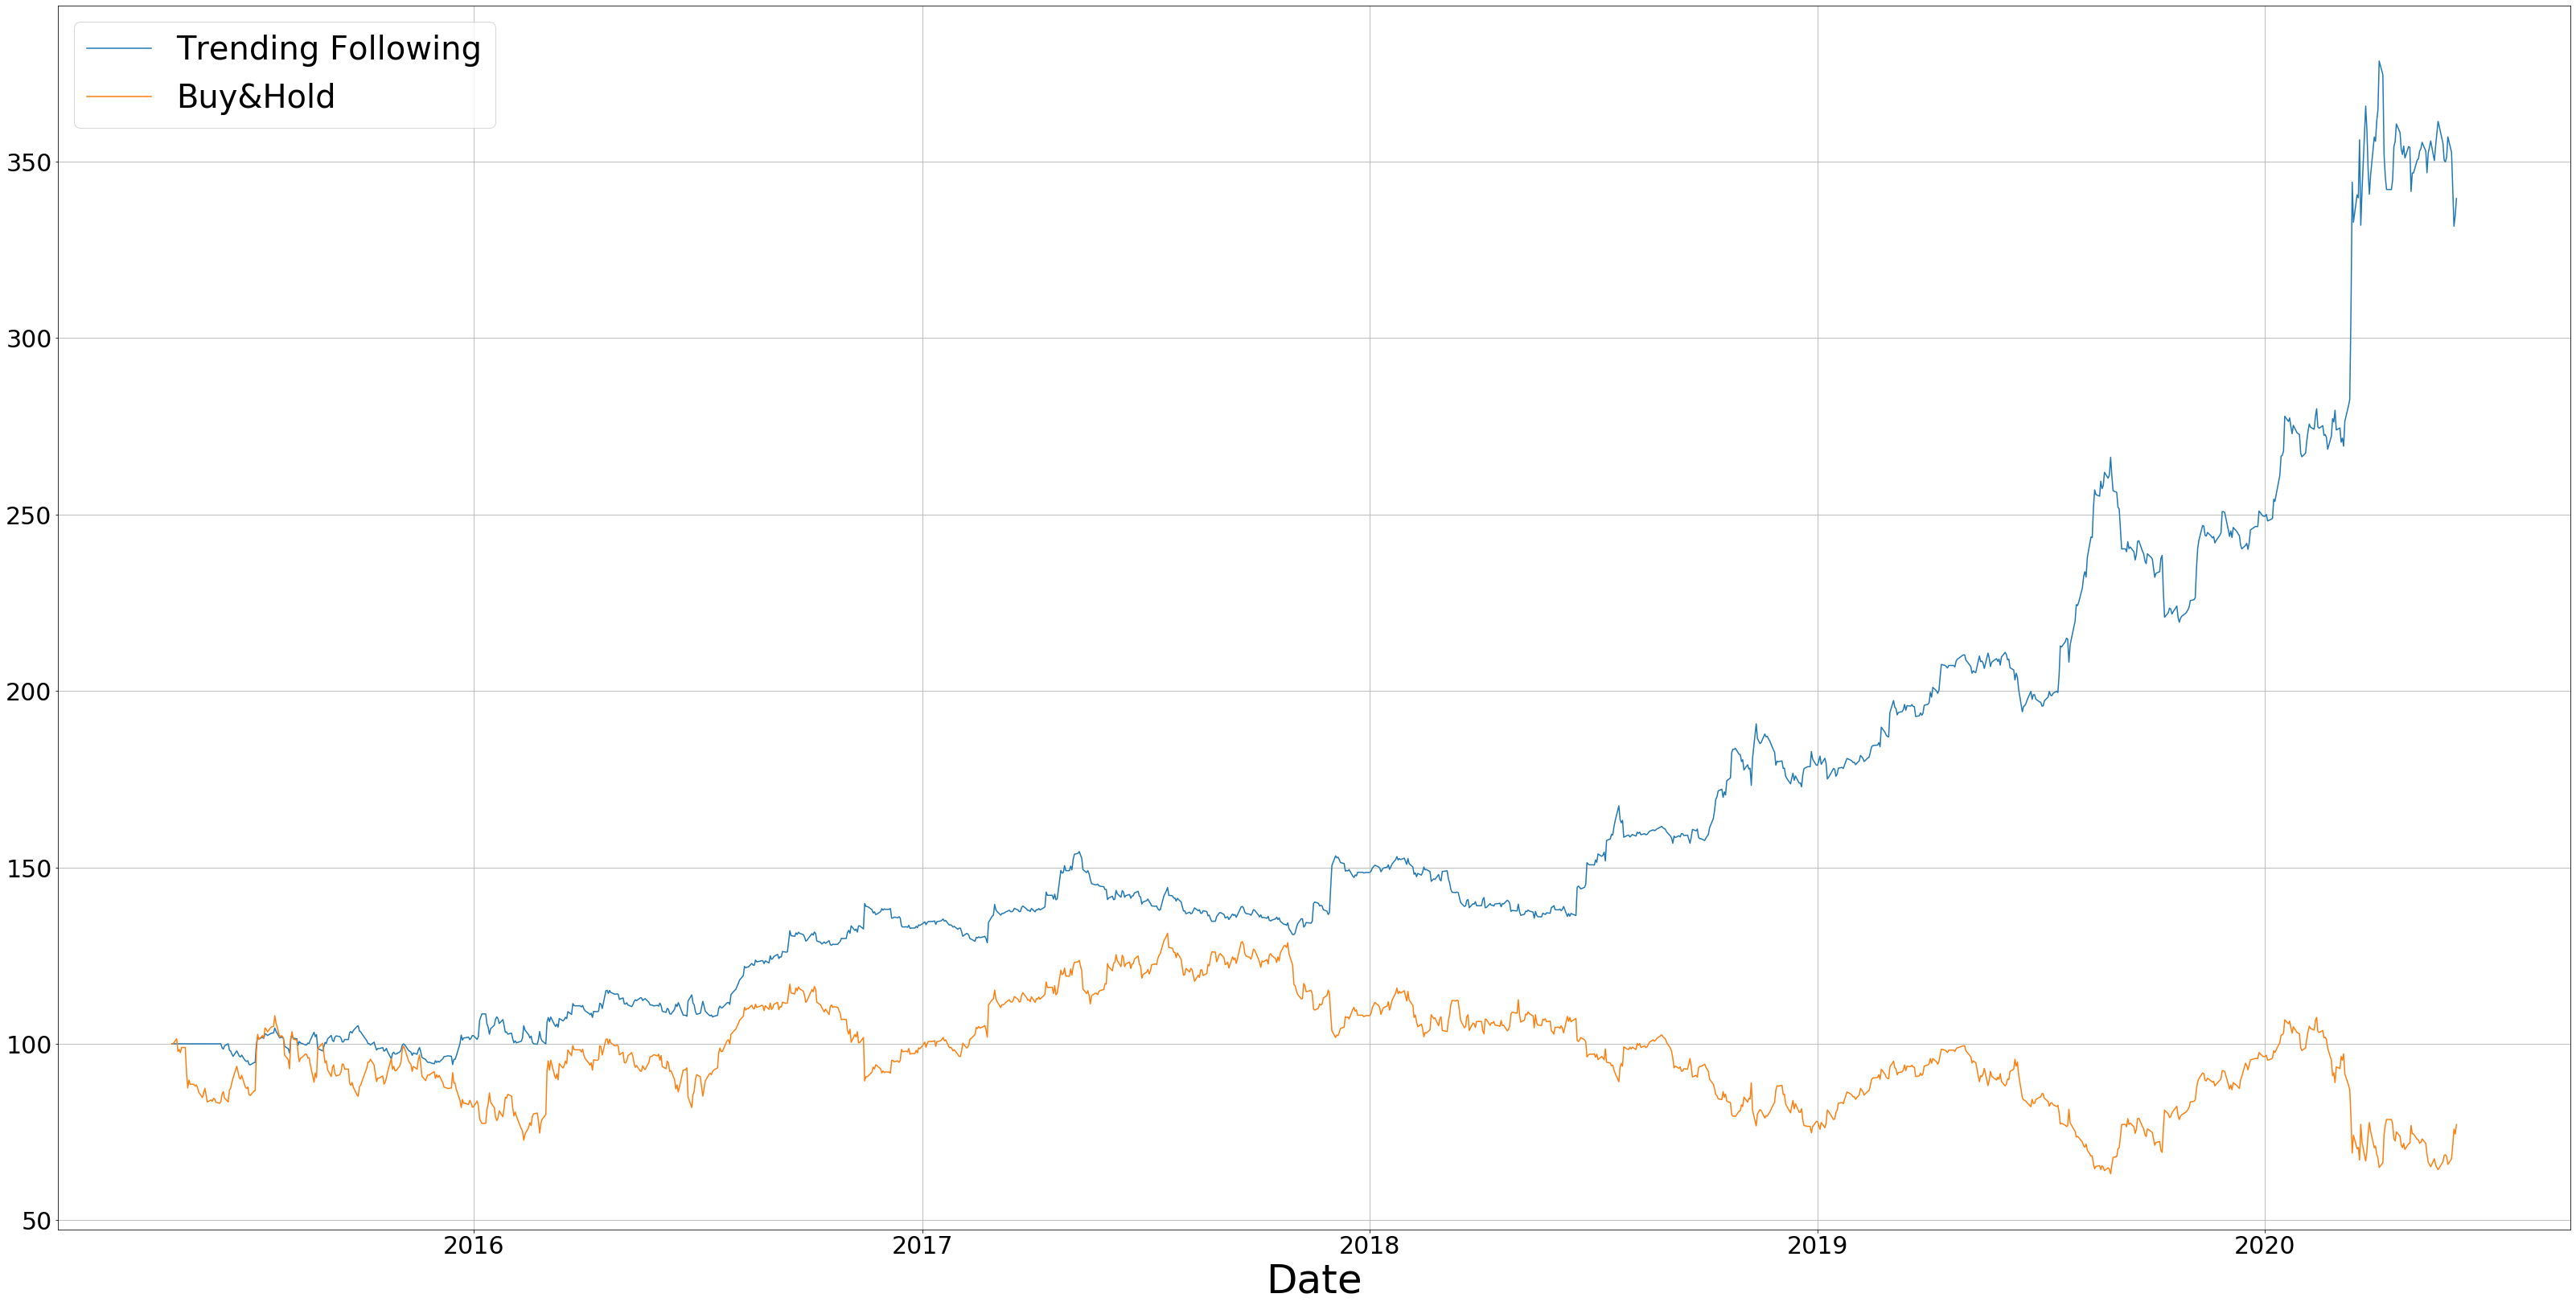

In [22]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["Trending Following"])
ax1 = plt.plot(Resultados["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Trending Following", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [23]:
indra_medias = pd.DataFrame(Resultados.loc[:, 'Trending Following'])
indra_medias.columns = ['TF indra']
indra_medias

,TF indra
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [24]:
indra_medias.to_csv('./data_resultante/TFindra.csv')